#  Data Visualization 

Let's get to know the data a bit better with a data analyst's best friend -- graphs.

Data visualization is a very important skill to have while analyzing your data and while presenting your findings to others, 
since it displays the patterns in the data in a clear format that's easier for others to understand. 
Often times, a good graph is better than whole paragraphs of explanation. 

To do so today we will use the `seaborn` and the `matplotlib` package. Matplotlib is a large and well supported package that forms the basis of a lot of plotting in Python. We have actually been using it already. `PANDAS` links to `matplotlib` and uses it when you stick .plot() at the end of a dataframe.  Seaborn is a new package designed to from the groundup to utilize `PANDAS` features to make it much simpler to plot. Today we will look at using seaborn to easily make graphs and using `matplotlib` directly to enable more direct control over the graphs we make. 



## Good and Bad Data Visualization Practices

Lab visualizations are great for understanding our data in a grphical fashion but as data scientists we must be
cognizant of when our visualizations start veering from infromative to misleading. Misleading graphs and bad visualizations
can range from comical to downright damaging.

A comical example of bad graphs is given by XKCD:
![image](https://imgs.xkcd.com/comics/y_axis_2x.png)

Though it seems silly to zoom into a line and exaggerate the feautures, we as data scientists may fall into this trap. 

Text(0, 0.5, 'Random y points')

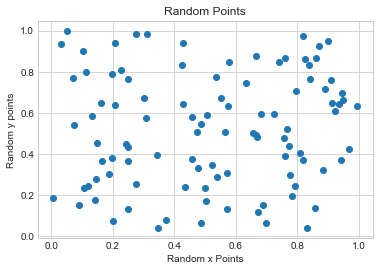

In [132]:
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

plt.scatter(np.random.rand(100,1), np.random.rand(100,1))
plt.title("Random Points")
plt.xlabel("Random x Points")
plt.ylabel("Random y points")

It's obvious that the graph just shows random data. However, if we screw around with the visualization lines:

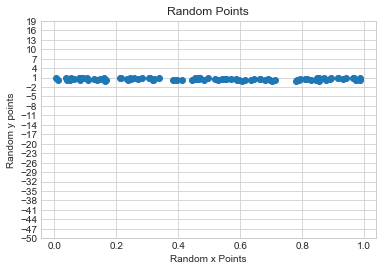

In [133]:
plt.scatter(np.random.rand(100,1), np.random.rand(100,1))
plt.title("Random Points")
plt.xlabel("Random x Points")
plt.ylabel("Random y points") 
plt.yticks(np.arange(-50, 20, 3));

We have the potential of misleading our audience that there exists a linear relationship between the random x-points 
and the random y-points when that was clearly not the case the previous graph. Though if you read the laxis labels
and view where the tick marks are, it's obvious that this graph is misleading. As data scientists, we would love to 
assume that the individuals looking at our graphs would dive deep into the visualization minutiae but sadly we cannot
hold that assumption.

Though it seems silly that our audience won't realize these blatant lies, it sadly is very commonplace in the world.
Take this absolutely insidious graph for example:

![image](https://www.gannett-cdn.com/presto/2020/06/06/USAT/0941fd23-0dd7-4f28-98a6-152ffb374245-Screen_Shot_2020-06-06_at_3.15.08_PM.png)

Though the percentage changes are trivial and can be attributed to random chance, the visualization is created to
create the illusion of correlation when in reality none exist. Though data scientists are not trying to intentionally
mislead people, we must be cautious in the _potential_ to mislead people instead which is why these examples are brought up.


Another pitfall that we may fall into could be survivorship bias. A visualization of this bias is shown below:
<img src=https://upload.wikimedia.org/wikipedia/commons/9/98/Survivorship-bias.png width="400">
This visualization is the composition of data acquired from returning battle planes during World War II. The red dots
indicate where the plane was shot by enemy fighte airrcraft during dogfights. The reason for collecting this data is to
figure out where to reinforce planes for future fighter aircrafts. Given this visualization, where should you put
reinforcements?

If you said "where the red dots are", then you have just fallen for survivorship bias! Common sense tells us to put
reinforcements where the red dots are since that's where all of the bullet holes are. However, what about the engines?
What about the cockpit? What about the tail? Surprisingly, it seems the enemy fighters selectively choose to _not_ 
shoot at critical plane plane features and instead just aim for the wings and body. There's obviously something amiss.

The key point here is that this is the data from planes that _returned_. Planes that were shot at the engine or the
cockpit ended up _not coming back to be a data point_. This graph is a view from the survivors that were lucky enough
to return and the downed planes ended up not being a data point in this graphic.

This is survivorship bias: concentrating on the data that did make it into the study and completeley overlooking and
neglecting the data that did not.

## 4. Visualization Design

Any unnecessary shapes, colors, images, and features that are present in your data visualization are known as "chart junk". 
Generally speaking, we want to be able to communicate information as succinctly and clearly as possible while minimizing the amount of distraction and clutter. 
In certain cases, chart junk can even lead to misleading visualizations.

Let's take a look at the visualization below:

![Picture title](3dbar.png)

Source: https://www.getnerdyhr.com/3d-pie-charts-are-evil/

Pie charts are known to be a poor visualization tool because humans have trouble interpreting area. 
If we add another dimension to the visualization and make a 3D pie chart, the visualization becomes harder to read because humans are even worse at interperting volume.
From the chart above, it appears that Paul has the most sales.

Below is the same pie chart rotated 130 degrees:

![Picture title](3dpie2.png)

Without changing anything about the actual data, it now appears that Bryan generated the most sales.
Looking at the actual data however, we see that Paul and Bryan actually have the exact same amount of sales! 

Hopefully, this exercise has convinced you that adding unnecessary features to a visualization can cause it to be misleading and uninsightful and to not use pie charts.

![Picture title](sales.png)

It may be too strong of a statement however to say that visual embellishments and unnecessarily complex designs have no place in data visualizations. 

In fact, in a research paper written in 2010 titled "[Useful Junk? The Effects of Visual Embellishment
on Comprehension and Memorability of Charts](http://www.stat.columbia.edu/~gelman/communication/Bateman2010.pdf)", the authors ran a variety of experiments comparing embelleshed and plain visualizations and 
concluded that 
"people’s accuracy in describing the embellished charts was no worse than for plain charts, and that their recall after a two-to-three-week gap was significantly better.

![Picture title](chart-junk.png)

Source: [Useful Junk? The Effects of Visual Embellishment
on Comprehension and Memorability of Charts](http://www.stat.columbia.edu/~gelman/communication/Bateman2010.pdf)

The visualizations above convey the same data but have drastically different design choices. 
However, despite the significant amount of chart junk in the right visualization, the area of the bars are roughly the same and display the same trends as the visualization on the left.

Which one do you like better?

# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line.
IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.
John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.



# Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

## Why Both?

Seaborn is based on Matplotlib.  It is something on "top" that helps make using matplotlib easier.
It helps knowing about matplotlib to understand what seaborn is doing/how to get it to do what you want.

In the wider context much of the code that exists in the wild that you might want to use/understant is written using matplotlib.  Therefore understanding how it works a bit is useful.  

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

The ``plt`` interface is what is used by far the most.  We will focus on that. 

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in a terminal, or in a notebook (what we use in class).

#### Plotting from a notebook


Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` magic command.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

We will generally opt for ``%matplotlib inline``.   In practice I have had various difficulties getting the *notebook* method to work well for everyone. 

In [135]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

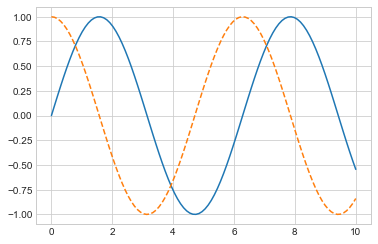

In [136]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');
plt.show()

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

### Same thing but with seaborn
Seaborn is made to work well with pandas dataframes.  WBy default seaborn uses the index as the x axis.  Then plots all the columns labeling with the column labels. So if we set the index to begin and organize our data well we can get a plot easily. 

<AxesSubplot:>

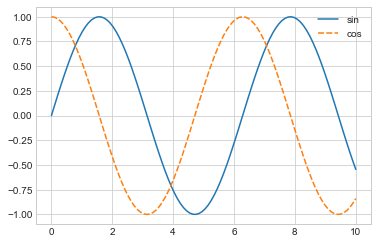

In [138]:
df = pd.DataFrame(index=x)
df['sin'] = np.sin(x)
df['cos'] = np.cos(x)

sns.lineplot(data=df)


# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

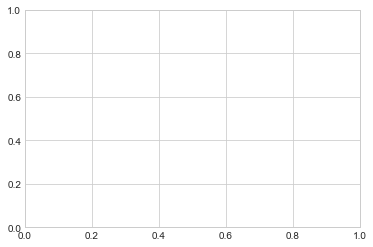

In [140]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this book, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

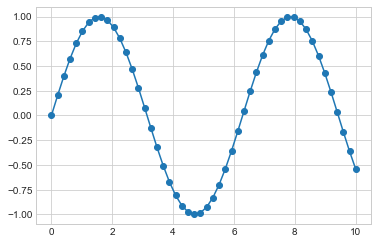

In [141]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 50)
ax.plot(x, np.sin(x),'o-');


Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](04.00-Introduction-To-Matplotlib.ipynb#Two-Interfaces-for-the-Price-of-One) for a discussion of these two interfaces):

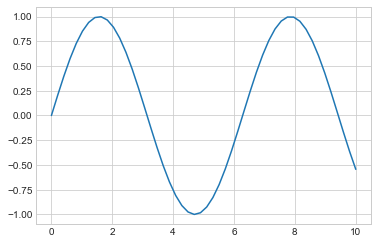

In [142]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

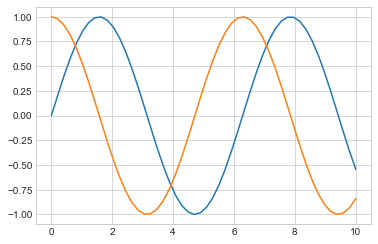

In [143]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

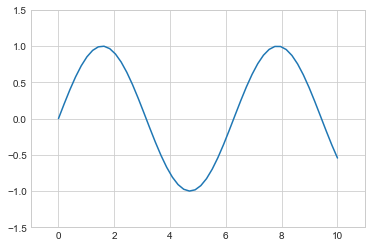

In [144]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

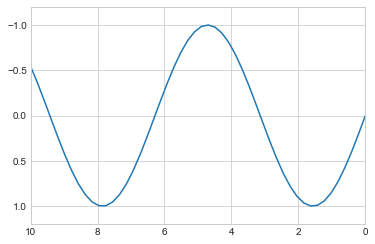

In [145]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

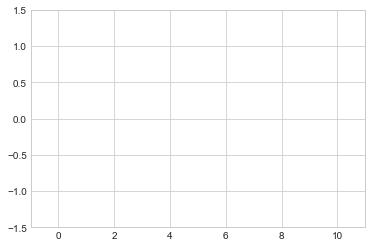

In [146]:
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

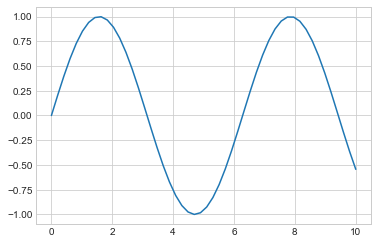

In [147]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

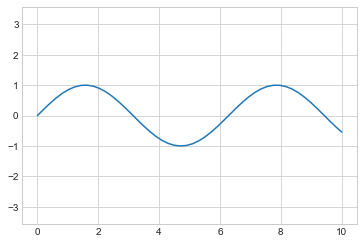

In [148]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring. Remember you can put a ``?`` in front of a function to get help

In [149]:
?plt.axis

Signature: plt.axis(*args, emit=True, **kwargs)
Docstring:
Convenience method to get or set some axis properties.

Call signatures::

  xmin, xmax, ymin, ymax = axis()
  xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
  xmin, xmax, ymin, ymax = axis(option)
  xmin, xmax, ymin, ymax = axis(**kwargs)

Parameters
----------
xmin, xmax, ymin, ymax : float, optional
    The axis limits to be set.  This can also be achieved using ::

        ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

option : bool or str
    If a bool, turns axis lines and labels on or off. If a string,
    possible values are:

    ======== ==========================================================
    Value    Description
    ======== ==========================================================
    'on'     Turn on axis lines and labels. Same as ``True``.
    'off'    Turn off axis lines and labels. Same as ``False``.
    'equal'  Set equal scaling (i.e., make circles circular) by
             changing axis limits

### Seaborn

These work with seaborn plots as well

(-0.5, 10.5, -1.0999445244849302, 1.0999973583088063)

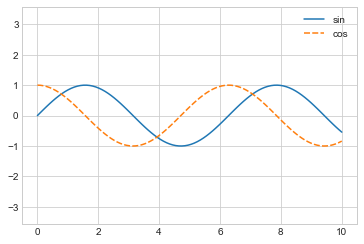

In [150]:
sns.lineplot(data=df)
# plt.xlim(-1, 11)
# plt.ylim(-1.5, 1.5);
plt.axis('equal')

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

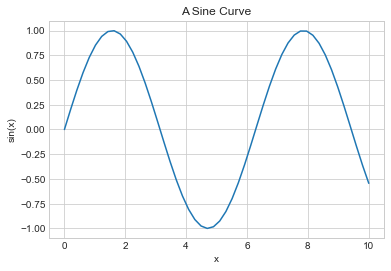

In [151]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

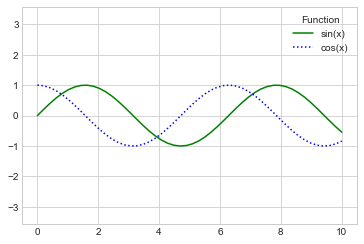

In [157]:
plt.plot(x, np.sin(x), '-g')
plt.plot(x, np.cos(x), ':b')
plt.axis('equal')

plt.legend(title="Function",labels=('sin(x)','cos(x)'));

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring (use ?plt.legend);

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
A powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

In [ ]:
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x, y, marker='o');

Just like with the simple line plots you can make multiple scatter plots in one graph.

In [ ]:

#Generate a first random set
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x, y)

#Generate a second random set offset from the first
x2 = np.random.randn(100)+2
y2 = np.random.randn(100)+2
plt.scatter(x2, y2)

plt.legend(['One','Two'])

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.



## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

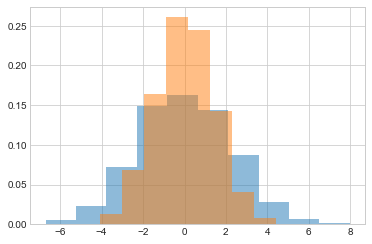

In [49]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

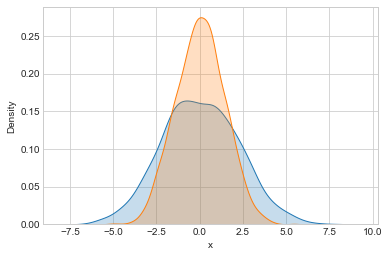

In [54]:
for col in ('x','y'):
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``displot()``:

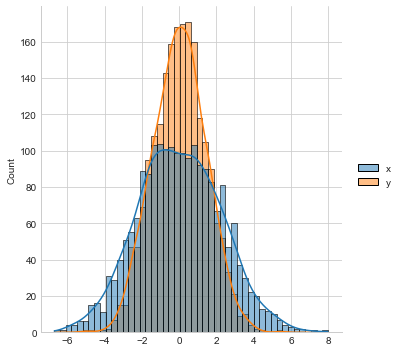

In [62]:
sns.displot(data=data,kde=True)


If we pass the full two-dimensional dataset to ``displot()``, we will get a two-dimensional visualization of the data:

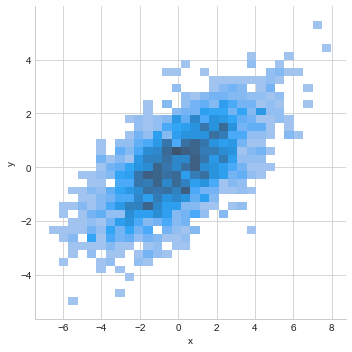

In [75]:
sns.displot(data=data,x='x',y='y');

We can get a smooth countour plot by specifying "kde".  This is the 2d analog to the 1d smooth histograms above. 

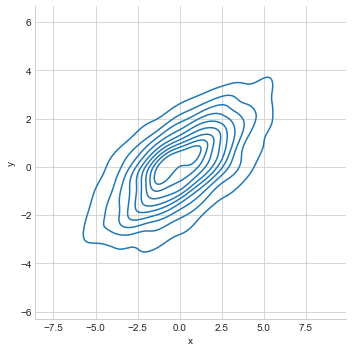

In [76]:
sns.displot(data=data,x='x',y='y',kind='kde');

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background.

The "with" applies the style to just the code following.  

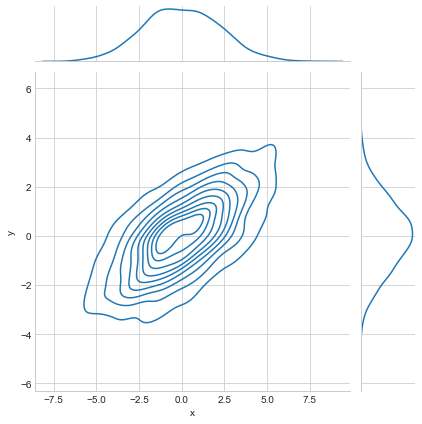

In [78]:
with sns.axes_style('white'):
    sns.jointplot(data=data,x="x", y="y", kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

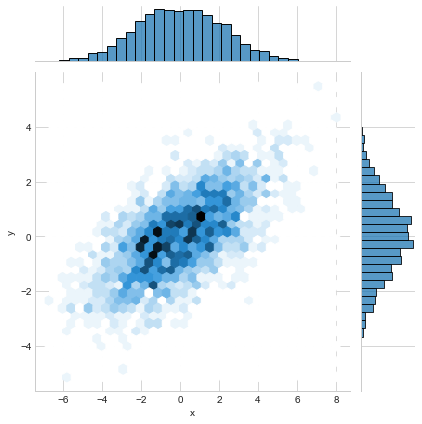

In [79]:
sns.jointplot(data=data,x="x", y="y", kind='hex');

You can even add regression lines with the 'reg'  to do a linear regression fit. 

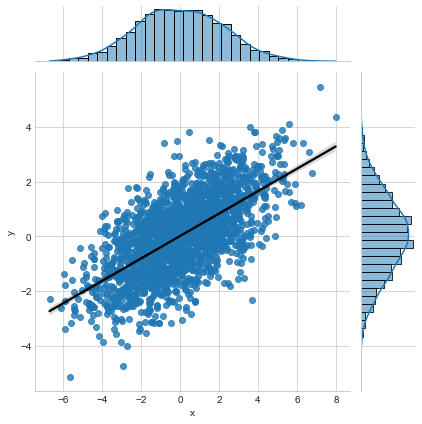

In [108]:
#the line_kws= option lets you set how the regression line is drawn
#
sns.jointplot(data=data,x="x", y="y", kind='reg',line_kws={"color": "black"});

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [109]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

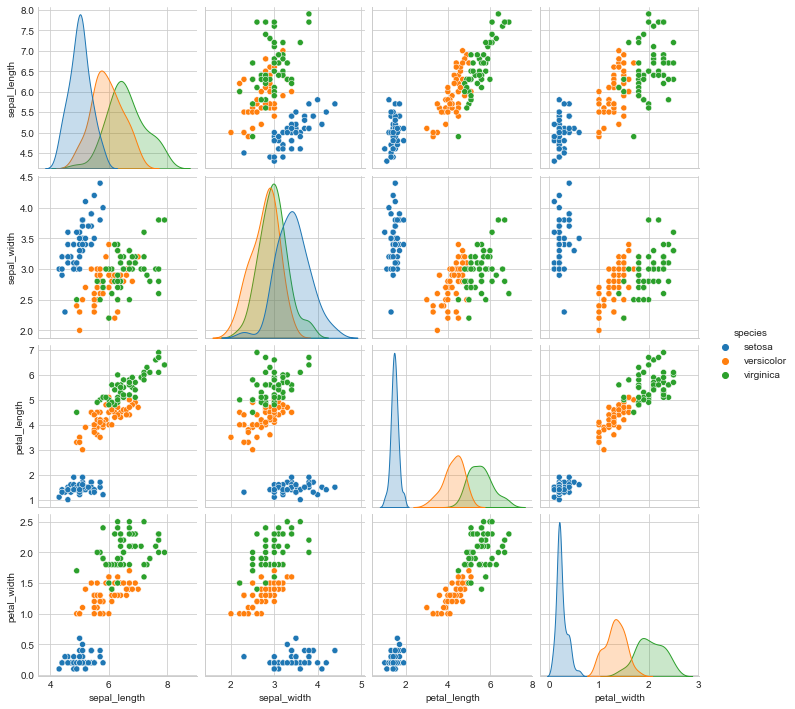

In [110]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


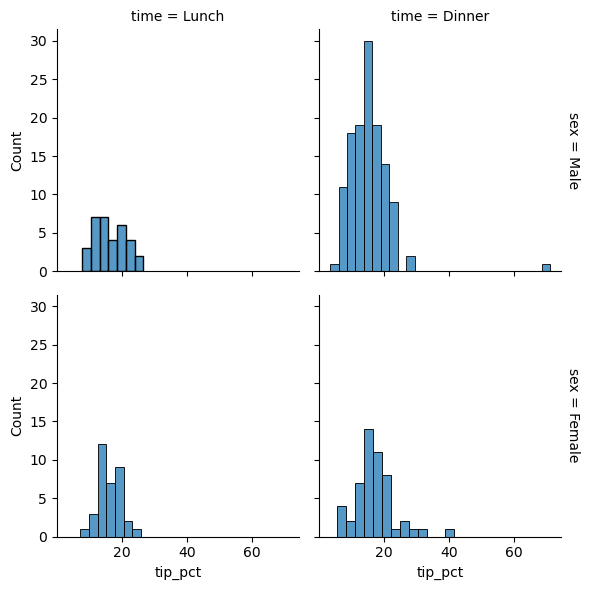

In [3]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

#sns.FacetGrid() sets up the grid.  You give it the data and the ID to use for rows and columns
grid = sns.FacetGrid(data=tips, row="sex", col="time", margin_titles=True)

# #grid.map_dataframe()  maps the plots to the approiate facet
grid.map_dataframe(sns.histplot, "tip_pct",);

### Categorical plots

Categorical plots are probably the ones that  are most familar. 

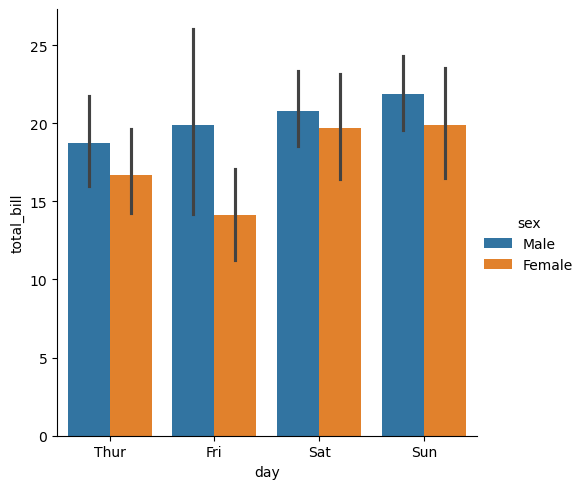

In [4]:

sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="bar")
#g.set_axis_labels("Day", "Total Bill");

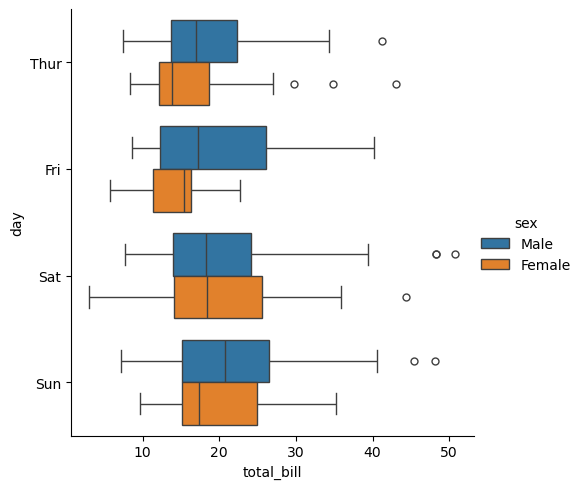

In [5]:
sns.catplot(data=tips, y="day", x="total_bill", hue="sex", kind="box")

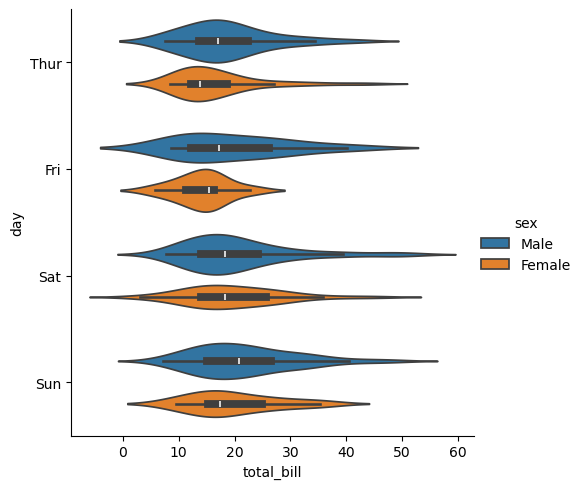

In [6]:
sns.catplot(data=tips, y="day", x="total_bill", hue="sex", kind="violin")

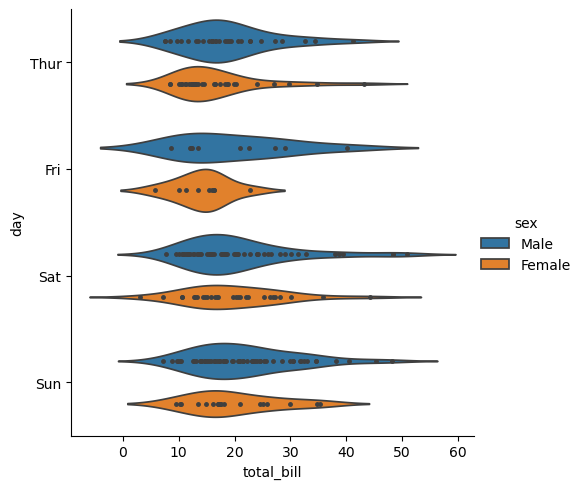

In [11]:
sns.catplot(data=tips, y="day", x="total_bill", hue="sex", kind="violin",inner='point')

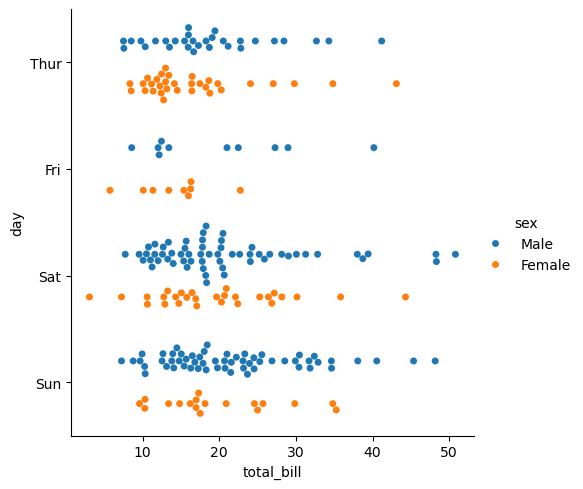

In [10]:
sns.catplot(data=tips, y="day", x="total_bill", hue="sex", dodge=True, kind="swarm")

## Multiple panels

sns.catplot() is great for creating multiple panel plots. 

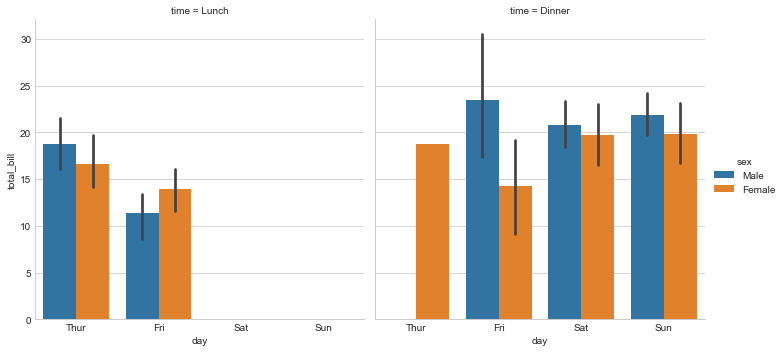

In [128]:
#sns.catplot()  also has a row= and col= option to easily use the facetgrid to make panels
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", col="time",kind="bar")

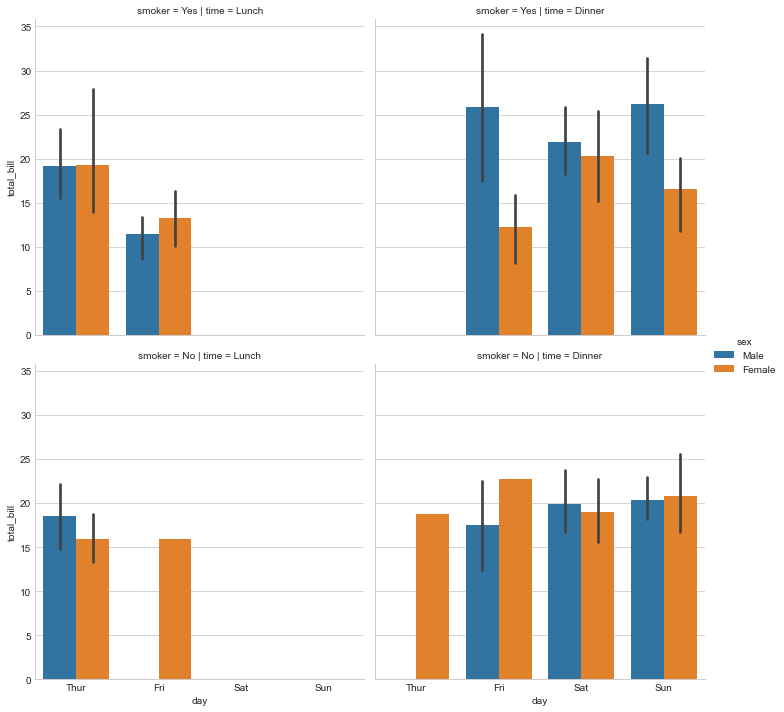

In [129]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", col="time",row="smoker",kind="bar")

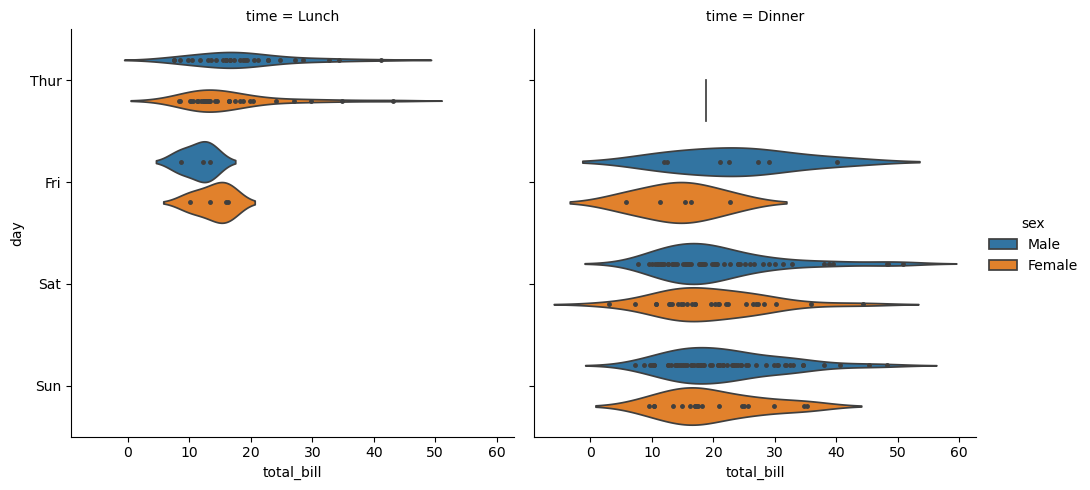

In [12]:
sns.catplot(data=tips, y="day", x="total_bill", col='time',hue="sex", kind="violin",inner='point')